# 숙제

In [ ]:
* 멜스펙트럼이 뭐야  
* 그래서 지금 뭘 하는거야  
* FFT가 뭐야  

# Librosa

Librosa는 realtime으로 볼 수 있다.  
반면 plt로 하면 realtime으로는 볼 수 없고, sample 개수가 x축에 그려진다.  

## Librosa로 그려보기

In [2]:
# pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 24.2 MB/s eta 0:00:0000:0100:01
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23704 sha256=d34f51727df42678b41b3da08db745e0b0af15fc9db99af63a098ec83a6cbc97
  Stored in directory: /Users/jongya/Library/Caches/pip/wheels/74/25/48/ad94b69151b78e9aeba6850da119f04eda1c811d22fcf4b32d
Successfully built audioread
  Attempting uninstall: numpy
    Found existing in

In [79]:
import matplotlib.pyplot as plt
import librosa.display
import soundfile
import numpy as np
import IPython.display

In [20]:
sound_contents, file_sampling_rate = soundfile.read('schoolbell_plane.wav')

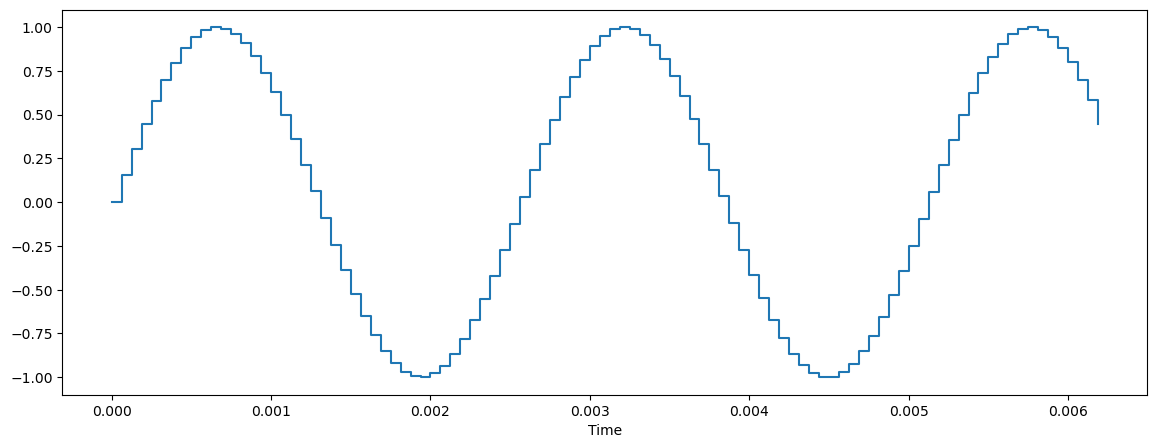

In [21]:
plt.figure(figsize = (14, 5))
librosa.display.waveshow(sound_contents[:100], sr = file_sampling_rate)

## 1사이클 그려보기

In [22]:
# 주파수 정의

pitch_do = 261.6256
pitch_re = 293.6648
pitch_mi = 329.6276
pitch_fa = 349.2282
pitch_sol = 391.9954
pitch_la = 440.0000
pitch_ti = 493.883
pitch_none = 0.0

In [23]:
sr = 16000 # sampling rate
T = 2.0    # running time
           ## 1초에 16000개, 총 2초면 32000개 sample 존재
amp = 1.0
t = np.linspace(0, T, int(T*sr))    # 32000개의 신호 제작

y_do = amp * np.sin(2 * np.pi * pitch_do * t)   # 주파수 적용한 신호
y_re = amp * np.sin(2 * np.pi * pitch_re * t)   # 주파수 적용한 신호
y_mi = amp * np.sin(2 * np.pi * pitch_mi * t)   # 주파수 적용한 신호
y_fa = amp * np.sin(2 * np.pi * pitch_fa * t)   # 주파수 적용한 신호
y_sol = amp * np.sin(2 * np.pi * pitch_sol * t) # 주파수 적용한 신호
y_la = amp * np.sin(2 * np.pi * pitch_la * t)   # 주파수 적용한 신호
y_ti = amp * np.sin(2 * np.pi * pitch_ti * t)   # 주파수 적용한 신호

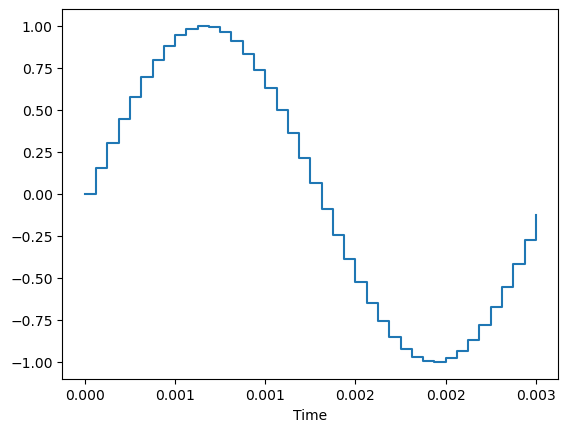

In [26]:
# 한 주기만 보기
a_cycle_time = int(file_sampling_rate/pitch_sol) + 1
librosa.display.waveshow(sound_contents[:a_cycle_time], sr = file_sampling_rate)

## matplotlib으로 그려보면?

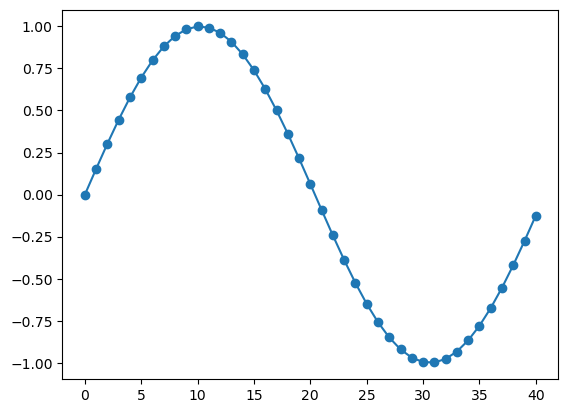

In [32]:
plt.plot(sound_contents[:a_cycle_time], "o-")
plt.show()

## FFT

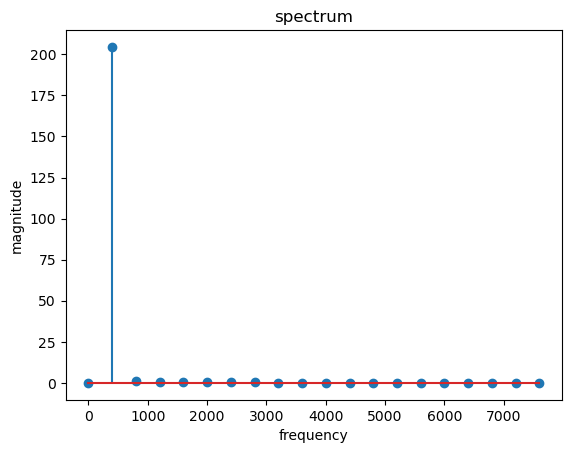

In [43]:
X = np.fft.fft(sound_contents[:a_cycle_time]*10) # 10ms
mag = np.abs(X)                                  # magnitude : 진폭
f = np.linspace(0, file_sampling_rate, len(mag))
f_left = f[:int(len(mag)/2)]                     # 주파수는 대칭임. 그러므로 반만 fft해도 됨
spectrum_X = mag[:int(len(mag)/2)]               # 주파수 스펙트럼

plt.stem(f_left, spectrum_X, 'o-')               # stem : 일반적인 선형 그래프가 아닌,
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('spectrum')
plt.show()

보면, 소리가 있는 sol 주파수 뿐만 아니라, 그 다음 주파수도 약간 값이 있다.  
이는, 자연스러운 현상으로 '배음' 현상인 것.

In [45]:
spectrum_X

array([1.23596191e-01, 2.04523227e+02, 1.26671764e+00, 7.14970734e-01,
       5.11691226e-01, 4.02647597e-01, 3.35579592e-01, 2.88834224e-01,
       2.55350541e-01, 2.30092000e-01, 2.11042737e-01, 1.95020868e-01,
       1.82746535e-01, 1.72020343e-01, 1.65670920e-01, 1.58567331e-01,
       1.53662277e-01, 1.50407379e-01, 1.47889283e-01, 1.45917565e-01])

## librosa.stft, display.specshow

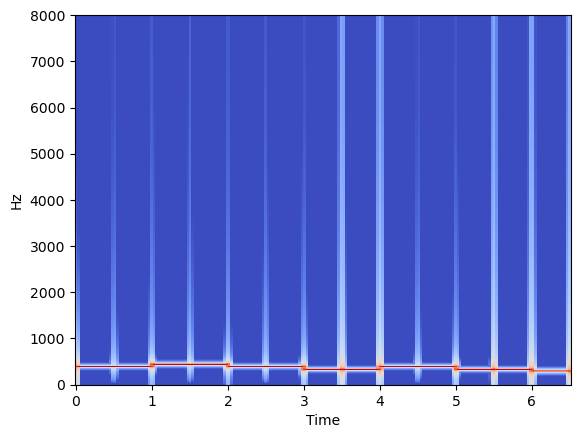

In [47]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X))
# amplitude : 진폭
# db : 데시벨

librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='hz')

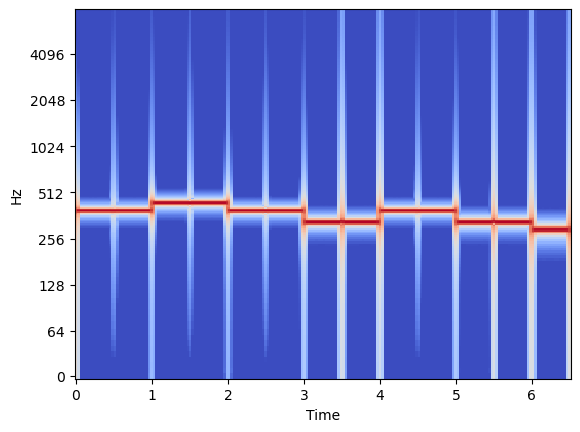

In [52]:
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
# log scale 을 사용하면,
# 아래위 남는 여백 없이, 주요 부분들에 집중해서 볼 수 있음



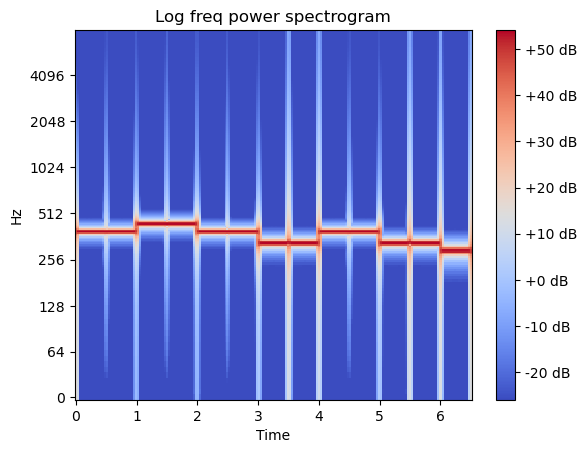

In [62]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X))
# amplitude : 진폭
# db : 데시벨
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
plt.title('Log freq power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

# db별로 그릴 수 있음
# -> 근데 이는 '기준'이 없음

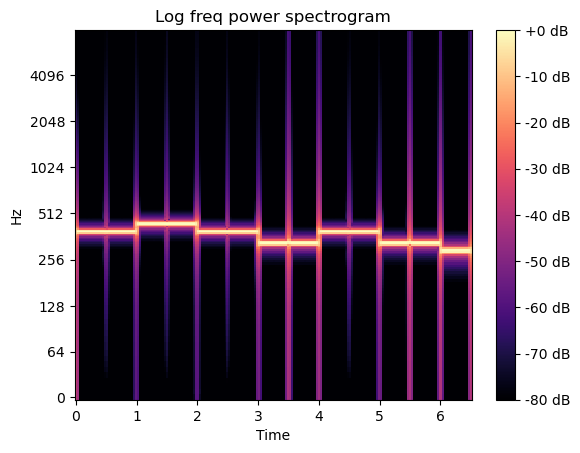

In [55]:
X = librosa.stft(sound_contents) # short time fourier transform
# 음성에서 short time은 일반적으로 10ms을 말한다.  

Xdb = librosa.amplitude_to_db(abs(X), ref=np.max) # 기준을 잡아줌 : max인 0db부터 아래로 내려가게끔
# 0db를 기준으로 삼는 이유 : 위로 올라가면 소리가 깨질 수 있음.
# 제일 작은 소리를 0으로 두면, 소리가 무한으로 커지면 그것을 재현할 수 없음
# 그러나 제일 큰 소리를 0으로 기준을 두면, 그보다 작은 소리는 마이너스 하면 되므로 재현 가능

# amplitude : 진폭
# db : 데시벨
librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='log')
plt.title('Log freq power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

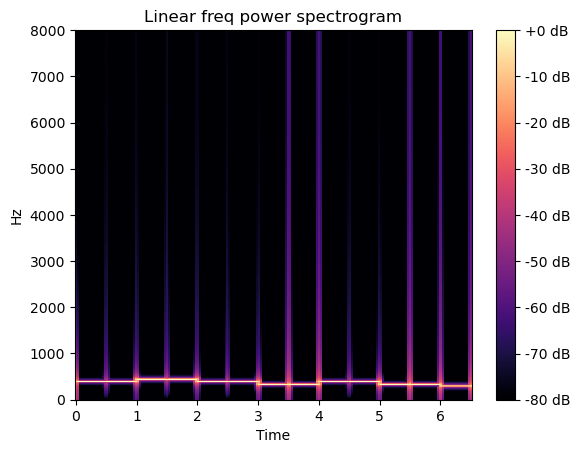

In [64]:
X = librosa.stft(sound_contents) # short time fourier transform


Xdb = librosa.amplitude_to_db(abs(X), ref=np.max) # 기준을 잡아줌 : max인 0db부터 아래로 내려가게끔

librosa.display.specshow(Xdb, sr=file_sampling_rate, x_axis='time', y_axis='linear')
plt.title('Linear freq power spectrogram')
# linear로 해보기
plt.colorbar(format='%+2.0f dB')
plt.show()

## MFCC (melspectrogram)

* 음역대를 n개로 나누어 데이터를 표시화는 것이 멜스펙트럼  
* 사람의 청각세포의 개수는 한정이 되어있고, 느낄 수 있는 음간 차이는 한계가 있으므로  
* 사람이 들을 수 있는 음차의 한계에 맞춰 음역대를 맞추면, 빠른 연산과 충분한 성능이 나올 것이라는 것  
* 멜스펙트럼의 개수가 너무 많으면(세분화하면) 연산량이 많아지고  
* 멜스펙트럼의 개수가 너무 적으면(대략 잡으면) 연산량은 적어지나, 제대로된 분류가 불가  

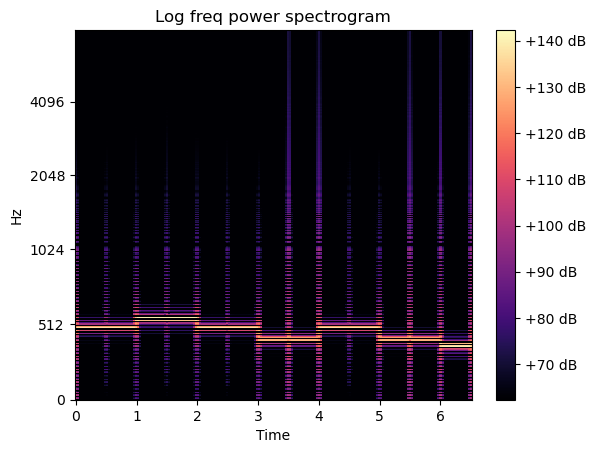

In [72]:
D = abs(librosa.stft(sound_contents)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=1028) # melspectrogram 구하기
# signal = D / n_mels : n_mels레벨을 지정 : Hz 구간을 몇 개로 나눌지 정의
# 이 부분을 너무 약하게(적게) 잡으면 분석이 잘 안될 것이고 (장르구분 등에서)
# 이 부분을 너무 강하게(많이) 잡으면 분석하는 데 시간이 오래 걸리고...
# 그리고, 우리 귀는 엄청 자세하게 듣지는 못하므로 (청세포의 개수는 정해져있음),  
# 그에 충분한 숫자 만큼만을 지정하면 되지 않느냐 => 라는 것에서 시작된 것이 멜스펙트럼

mel_db = librosa.amplitude_to_db(mel_spec, ref=0.000001) # 0.000001

librosa.display.specshow(mel_db, sr=file_sampling_rate, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('Log freq power spectrogram')

plt.colorbar(format='%+2.0f dB')
plt.show()

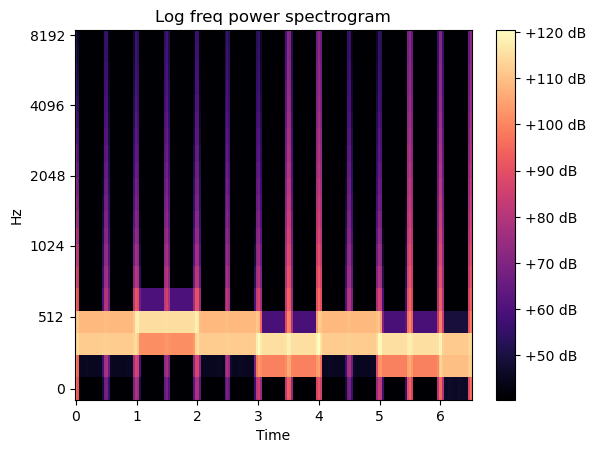

In [74]:
D = abs(librosa.stft(sound_contents)) # 데이터 : 절대값 바로 먹임
mel_spec = librosa.feature.melspectrogram(S=D, n_mels=20) # melspectrogram 구하기
# signal = D / n_mels : n_mels레벨을 지정 : Hz 구간을 몇 개로 나눌지 정의
# 이 부분을 너무 약하게(적게) 잡으면 분석이 잘 안될 것이고 (장르구분 등에서)
# 이 부분을 너무 강하게(많이) 잡으면 분석하는 데 시간이 오래 걸리고...
# 그리고, 우리 귀는 엄청 자세하게 듣지는 못하므로 (청세포의 개수는 정해져있음),  
# 그에 충분한 숫자 만큼만을 지정하면 되지 않느냐 => 라는 것에서 시작된 것이 멜스펙트럼


mel_db = librosa.amplitude_to_db(mel_spec, ref=0.000001) # 0.000001

librosa.display.specshow(mel_db, sr=file_sampling_rate, x_axis='time', y_axis='mel') # y_axis 바뀜
plt.title('Log freq power spectrogram')

plt.colorbar(format='%+2.0f dB')
plt.show()

# 실습

In [77]:
sound_content, sample_rate = soundfile.read('aeiowoo.wav')


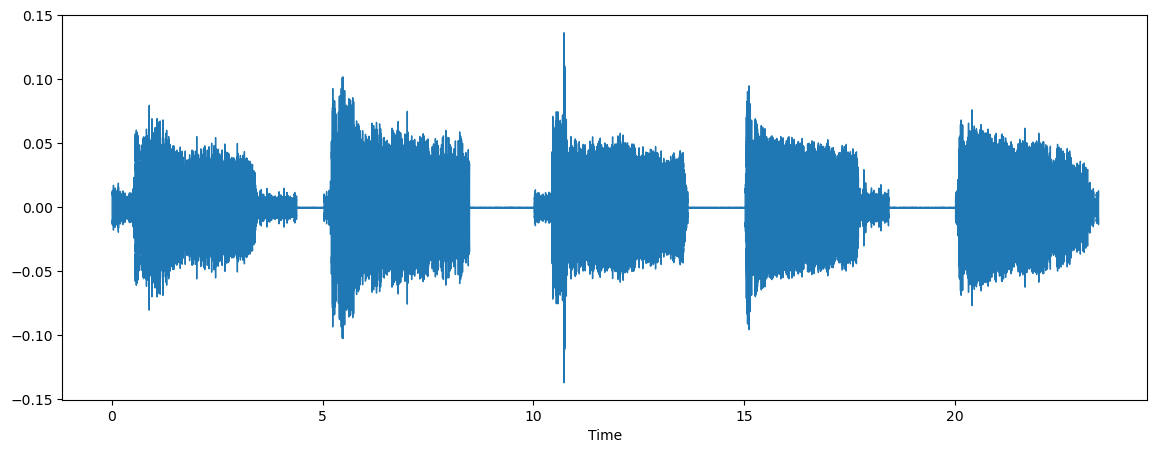

In [94]:
# 전체
plt.figure(figsize = (14, 5))
librosa.display.waveshow(sound_content, sr = sample_rate)

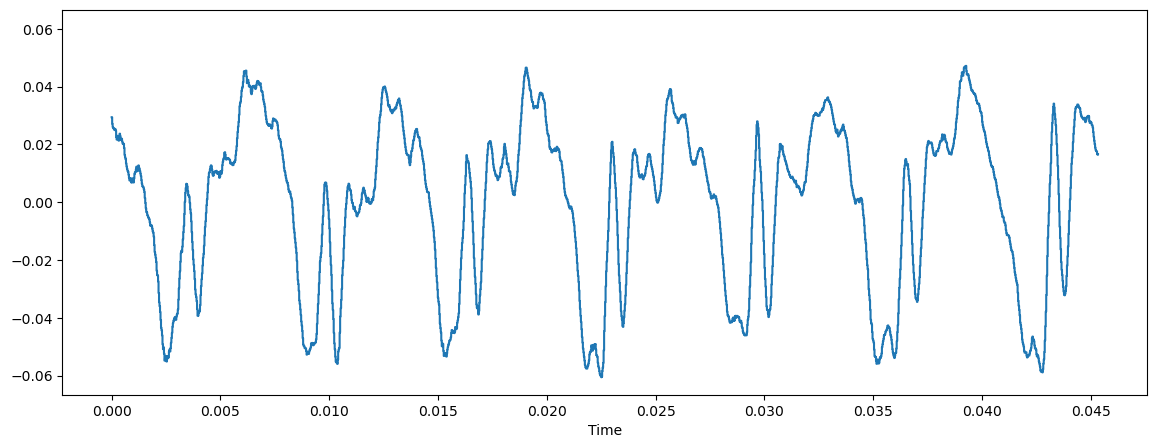

In [109]:
# 아~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 0.55
librosa.display.waveshow(sound_content[int(start_sec*44100):int(start_sec*44100+2000)], sr = sample_rate)

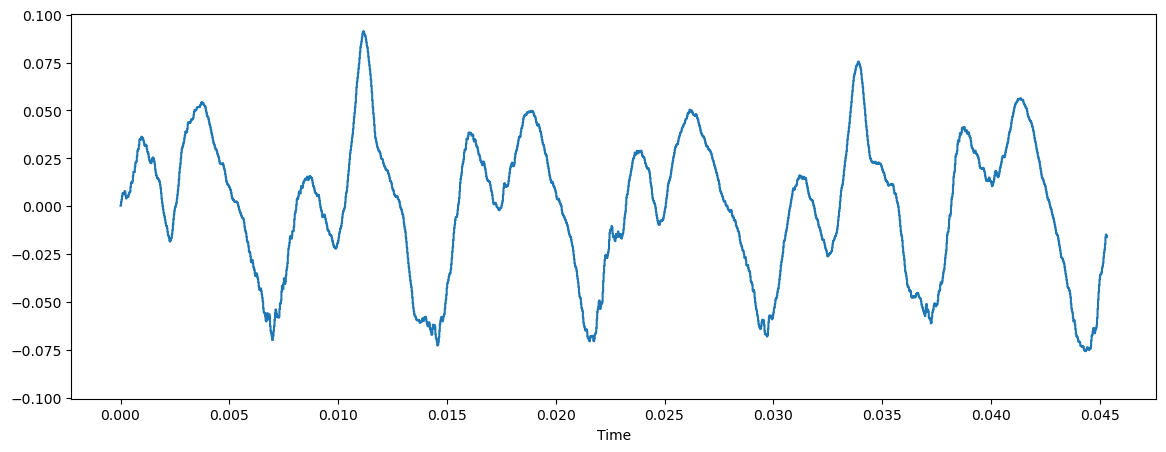

In [110]:
# 에~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 5.5
librosa.display.waveshow(sound_content[int(start_sec*44100):int(start_sec*44100+2000)], sr = sample_rate)

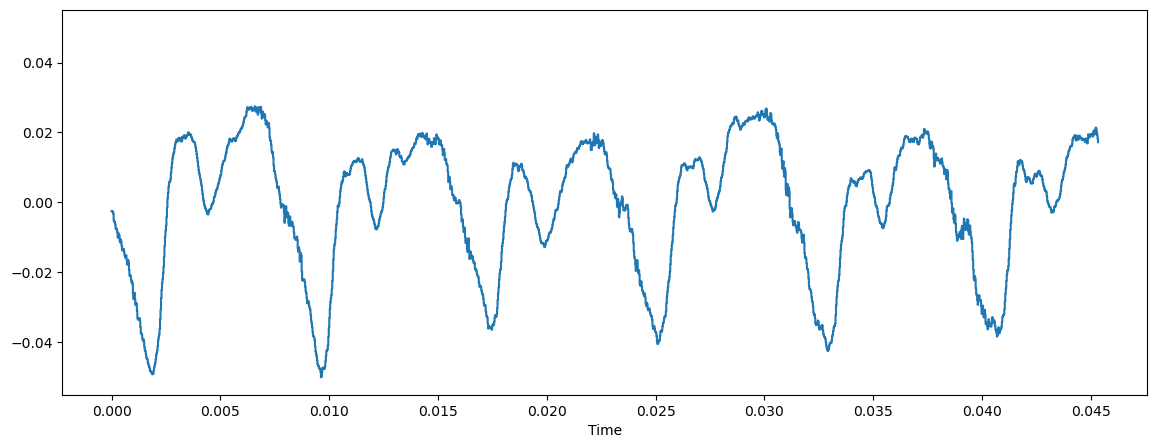

In [111]:
# 이~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 11
librosa.display.waveshow(sound_content[int(start_sec*44100):int(start_sec*44100+2000)], sr = sample_rate)

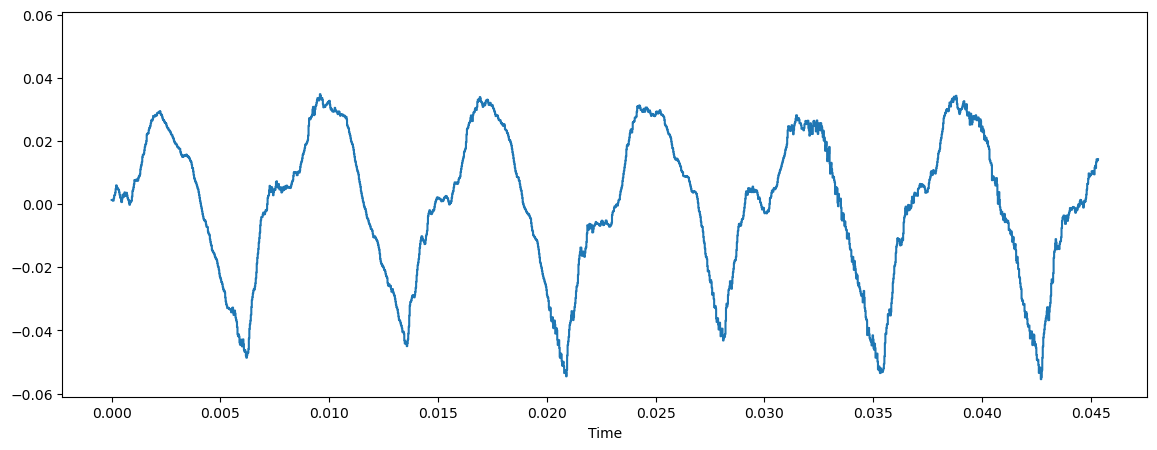

In [112]:
# 오~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 16
librosa.display.waveshow(sound_content[int(start_sec*44100):int(start_sec*44100+2000)], sr = sample_rate)

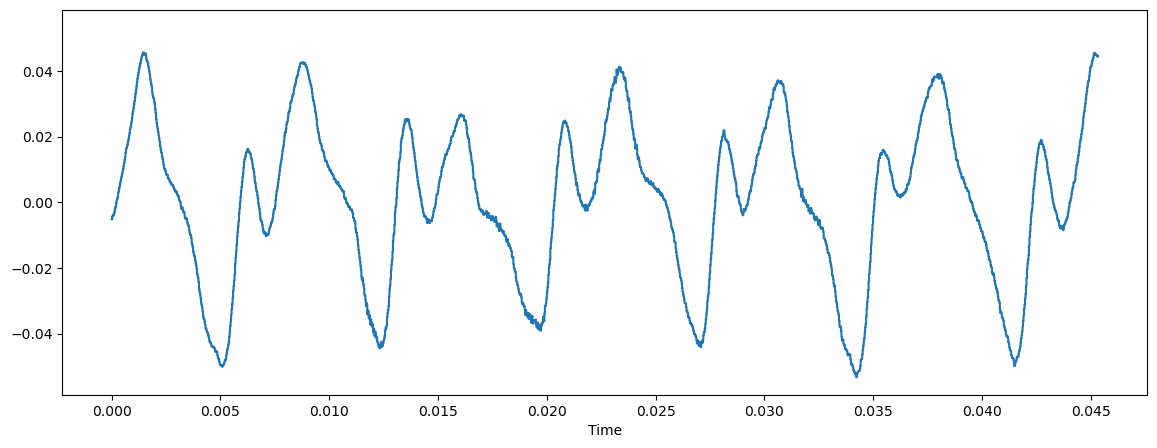

In [113]:
# 우~ 부분 패턴
plt.figure(figsize = (14, 5))
start_sec = 21
librosa.display.waveshow(sound_content[int(start_sec*44100):int(start_sec*44100+2000)], sr = sample_rate)